In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
observations = 1000 

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

inputs

print(inputs.shape) 


(1000, 2)


In [28]:
xs
zs

array([[ 1.93311414e+00],
       [-4.33341700e+00],
       [ 1.58496158e+00],
       [-7.65075426e-01],
       [ 4.22621474e+00],
       [ 8.93564132e+00],
       [ 8.54013012e+00],
       [ 6.41285093e+00],
       [-2.53231960e+00],
       [ 6.82708103e+00],
       [ 5.18350794e+00],
       [ 6.93275120e+00],
       [-5.40191329e+00],
       [-7.95181999e+00],
       [-5.97513874e+00],
       [ 8.46885791e+00],
       [-3.43906485e+00],
       [ 8.13083661e+00],
       [-3.47785460e+00],
       [ 2.94403819e+00],
       [-3.85319714e+00],
       [-7.29819723e+00],
       [ 2.37007061e+00],
       [-6.89510784e+00],
       [ 9.07382528e-01],
       [-6.88077224e+00],
       [ 9.23920337e+00],
       [-8.13454797e+00],
       [-1.83650507e+00],
       [ 1.39958898e+00],
       [ 4.55038744e+00],
       [-5.85296361e+00],
       [-2.18759964e+00],
       [-8.16095481e+00],
       [ 8.48497575e+00],
       [ 4.66540787e+00],
       [ 4.35248444e+00],
       [-2.26540886e-01],
       [ 2.3

### create targets

In [29]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs -3*zs + 5 + noise
print(targets.shape)

(1000, 1)


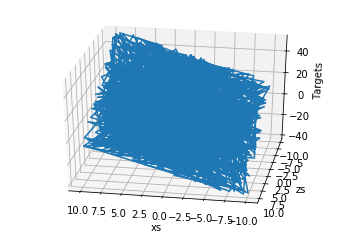

In [30]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### init_range is d radius of d range to initialize d weight $biases from -0.1-0.1

In [31]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[-0.05337895]
 [ 0.0468861 ]]
[-0.00036208]


### set the learning rate

In [32]:
learning_rate = 0.02

### train the model

### for the loss we will make use of l2-norm since it is regression.output is the linear equation

In [35]:
for i in range (100):
    outputs = np.dot(inputs,weights)+biases
    deltas = outputs - targets
    
    loss=np.sum(deltas ** 2)/2/observations
    
    print(loss)
    
    deltas_scaled=deltas / observations
    
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    biases = biases -learning_rate * np.sum(deltas_scaled)
    

0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533
0.16905827833837533


### print weight weight and biases to confirm optimality

In [36]:
print(weights,biases)

[[ 2.00134161]
 [-3.00303407]] [5.01422085]


### plot last output to targets

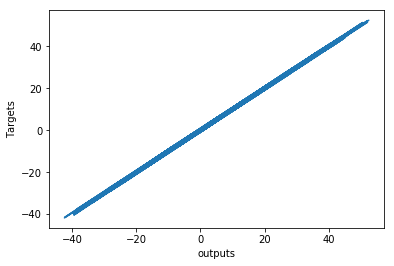

In [38]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('Targets')
plt.show()

### the closer this plot is to the 45 line the closer the output are to the targets